<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Planejamento de Experimentos 
</h1>


# <font color='red' style='font-size: 30px;'>1.0 Introdução   </font>
<hr style='border: 2px solid red;'>




<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> “Chamar um especialista em estatística depois que o experimento foi feito pode ser o mesmo que pedir para ele fazer um exame post-mortem. Talvez ele consiga dizer do que foi que o experimento morreu.”  </i>     
</p>    

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: right; text-indent: 0px;'>    
    <b>Sir Ronald Fisher</b>  

<hr>






# <font color='red' style='font-size: 30px;'> Introdução à análise de experimentos   </font>
<hr style='border: 2px solid red;'>

# <font color = 'purple'> Inserindo o experimento num Data Frame </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

## Importando as bibliotecas 

### Pandas

https://pandas.pydata.org/

In [1]:
import pandas as pd

### Numpy

http://www.numpy.org/

In [2]:
import numpy as np

### Matplotlib (para os gráficos iniciais não sumirem)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline



<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Ensaios realizados na forma normalizada</b> 


<img width='800px' src='figuras/Figura_2.png'>

 
   
   
    


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
<font color="MidnightBlue"> Construindo uma matriz representando todos os ensaios realizados:


In [4]:
ensaios = np.array([[-1,-1],[1,-1],[-1,1],[1,1]])

### pyDOE2

https://pypi.org/project/pyDOE2/

In [5]:
pip install pyDOE2

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25553 sha256=e1961a6c385e93952c8d0a27ac308a598d19c59793c5d746c5403c4cddeecfd1
  Stored in directory: c:\users\vitoria neris\appdata\local\pip\cache\wheels\c5\7c\f8\3c3444b5ad812bf9f164d0391e18b0a45f08f1f7af501d45a6
Successfully built pyDOE2
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pyDOE2 as doe

## Costruindo um planejamento fatorial de 2²


em *(2)* corresponde ao número de variáveis manipuláveis (farinha e chocolate)

In [7]:
ensaios = doe.ff2n(2)

In [8]:
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

Notamos que a matriz que é criada é exatamente a mesma que construímos manualmente em células acima

## Inserindo o planejamento em um Data Frame

In [9]:
experimento = pd.DataFrame(ensaios, columns=['Farinha','Chocolate'])

In [10]:
experimento

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


### Inserindo coluna com os resultados 

In [11]:
experimento['Porcoes'] = [19,37,24,49]

In [12]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="MidnightBlue"> <b>Conclusão:</b> Temos, por fim, nosso experimento representado por um <i>DataFrame</i> do Pandas. Usaremos este <i>DataFrame</i> para iniciarmos a análise do nosso experimento. 
    
<hr>   

# <font color = 'purple'> Analisando graficamente o experimento   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

###  Importando o Seaborn

https://seaborn.pydata.org

In [13]:
import seaborn as sns

In [14]:
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('terrain')

# estilo -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

### Para a farinha

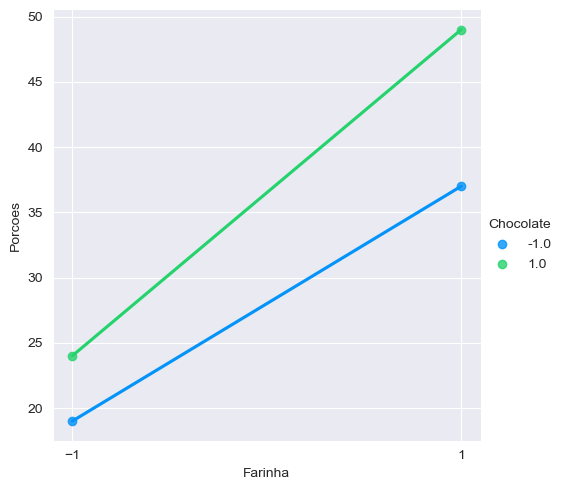

In [15]:
ax1 = sns.lmplot(data = experimento, x = 'Farinha', y = 'Porcoes', ci = None, hue='Chocolate')

ax1.set(xticks = (-1,1))

Podemos ver nessas duas linhas que a linha verde mostra o efeito da farinha para quando o chocolate está no nível superior e a linha azul mostra o efeito da farinha quando o chocolate está no nível inferior.

### Para o chocolate

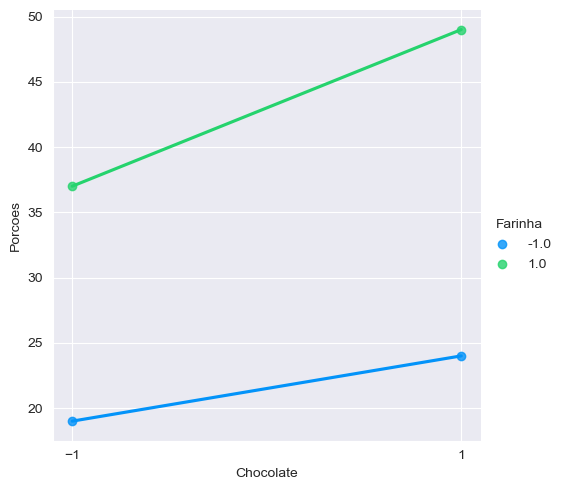

In [16]:
ax2 = sns.lmplot(data=experimento, x = 'Chocolate', y='Porcoes', ci = None, hue = 'Farinha')

ax2.set(xticks=(-1,1))

# <font color = 'purple'> Ajustando o modelo estatístico </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>


### Bibliotecas  Stats Model


In [17]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

### .

In [18]:
modelo = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

 *o StatsModel não usa o sinal de igual, ao invés disso, ele usa o til

Agora, precisamos fazer com que o ols ajuste os parâmetros deste modelo, utilizando o ".fit()"

In [19]:
modelo_ajustado = modelo.fit()

In [20]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 23 May 2023   Prob (F-statistic):                nan
Time:                        10:40:48   Log-Likelihood:                 126.02
No. Observations:                   4   AIC:                            -244.0
Df Residuals:                       0   BIC:                            -246.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        in

C:\Users\Vitoria Neris\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\Vitoria Neris\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Vitoria Neris\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Vitoria Neris\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\Vitoria Neris\anaconda3\lib\site-packages\statsmodels\base\model.py:1512: RuntimeWarning: inva

Com base nos dados da tabela, em "coef", o efeito da farinha possui maior influência na quantidade de cupcakes produzidos (b1 = 10,75), seguido do chocolate com b2 = 4,25. O primeiro, o Intercepto, representado pelo b0 = 32,25, é um valor constante, que não contabiliza efeitos das variáveis manipuláveis na quantidade cupcakes produzidos. Logo, o intercepto não é considerado um efeito.

# <font color = 'purple'> Aumentando os Graus de liberdade  </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



<p style='margin: 30px 30px;'>     
    


<hr>


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Replicatas no centro</b>


<img width='800px' src='figuras/Figura_5.png'> 


<p style='margin: 30px 30px;'> 
    
    
 
    

    
<hr>    

In [21]:
centro = np.array([[0,0,29],
                   [0,0,30],
                   [0,0,29],
                   [0,0,30],
                  ])

In [22]:
centro_dataframe = pd.DataFrame(centro, columns= ['Farinha','Chocolate','Porcoes'], index=[4,5,6,7])

In [23]:
centro_dataframe

,Farinha,Chocolate,Porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


### .

In [24]:
experimento = experimento.append(centro_dataframe)

C:\Users\Vitoria Neris\AppData\Local\Temp\ipykernel_3864\292207606.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  experimento = experimento.append(centro_dataframe)


In [25]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


Temos os ensaios iniciais (0,1,2,3) e a partir do 4 temos os novos dados experimentais. Agora temos 8 pontos experimentais, ou seja, 8 graus de liberdade.

# <font color = 'purple'>  Análise de significância estatística   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [26]:
modelo = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [27]:
modelo_ajustado = modelo.fit()

In [28]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Tue, 23 May 2023   Prob (F-statistic):            0.00152
Time:                        10:40:50   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

C:\Users\Vitoria Neris\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Primeiro ponto que podemos observar é o número de graus de liberdade dos nossos resíduos (Df Residuals), são quatro, como vimos anteriormente, eles são maiores que zero, então podemos fazer o teste de significância estatística.

<p style='margin: 200px 200px;'>    


<hr>


    
 <img width='400px' src='figuras/Figura_6.png'> 


<p style='margin: 30px 30px;'>    

<hr>


 <img width='600px' src='figuras/Figura_7.png'> 


<p style='margin: 30px 30px;'>        
    
    
 <hr>   
    

  
 <img width='600px' src='figuras/Figura_10.png'> 


<p style='margin: 30px 30px;'>       
  
<hr>        

A região em amarelo, que é numericamente igual a “P” maior do que o módulo de “t”, ela é a probabilidade de um parâmetro ser ou não estatisticamente significativo.


# <font color = 'purple'> Teste de significância estatística usando o <b>t<b>    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>





<hr>
<img width='600px' src='figuras/Figura_11.png'> 


<hr>
  <p style='margin: 30px 30px;'>     
<img width='900px' src='figuras/Figura_8.png'> 


<hr>



<p style='margin: 150px 150px;'>     
<img width='1000px' src='figuras/Figura_20.png'



<hr>
<p style='margin: 150px 150px;'>    

* linha vermelha = limite do Ttabelado

In [29]:
t_valores = modelo_ajustado.tvalues

In [30]:
t_valores

Intercept            43.494275
Farinha              10.708252
Chocolate             4.233495
Farinha:Chocolate     1.743204
dtype: float64

In [31]:
nome = t_valores.index.tolist()

In [32]:
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

### .

In [33]:
from scipy import stats

### .


In [34]:
distribuicao = stats.t(df = 4)

In [35]:
distribuicao.ppf(q= 1-0.025)

2.7764451051977987

In [36]:
limite = [distribuicao.ppf(q = 1 -0.025)]*len(nome)

In [37]:
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

### Plotando o gráfico 

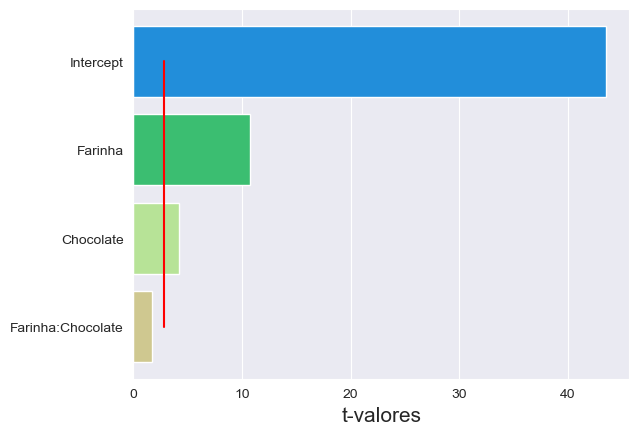

In [38]:
pareto = sns.barplot(x = t_valores, y = nome)
pareto.set_xlabel('t-valores', fontsize=15)

pareto.plot(limite, nome, 'r')

Todos são estatisticamente significativos, exceto a interação da Farinha e Chocolate = neste caso não podemos descartar a hipótese nula e teremos que dizer que ele não é estatisticamente significativo, ou seja, ele não influencia a quantidade de cupcakes produzidos.

# <font color = 'purple'> Propondo um novo modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>

Após termos realizado os testes de significância estatística, chegamos a conclusão que este efeito interação não é estatisticamente significativo.
Ou seja: este efeito, do ponto de vista estatístico, não influencia a quantidade de cupcakes produzidos.

Vamos usar essa informação para atualizar o modelo e propor um novo:

<p style='margin: 200px 200px;'>


<hr>

<img width='600px' src='figuras/Figura_9.png'> 

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>


<p style='margin: 30px 30px;'>

    
<hr>    


In [39]:
modelo_2 = smf.ols(data= experimento, formula = 'Porcoes ~ Farinha + Chocolate')

In [40]:
modelo_ajustado_2 = modelo_2.fit()

In [41]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Tue, 23 May 2023   Prob (F-statistic):           0.000571
Time:                        10:50:50   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

C:\Users\Vitoria Neris\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Primeiro, analisando os graus de liberdade dos resíduos: Anteriormente o modelo tinha 4 parâmetros, agora, na forma atualizada, ele tem apenas 3. Portanto, os graus de liberdade aumentaram: antes eram 4, agora são 5.

Analisando os coeficientes ajustados (coef): Entre os efeitos, a farinha é a que apresenta maior efeito, ou seja, ela é a que mais influencia na quantidade de cupcakes produzidos. Em segundo lugar, temos um efeito menor do chocolate na definição da quantidade de cupcakes produzidos.

Avaliando a significância estatística dos parâmetros deste novo modelo, vamos observar o "P > |t|", que representa a probabilidade de hipótese nula ou não nula (hipótese nula = parâmetros não estatisticamente significativos).

- O intercepto tem a probabilidade 0 da hipótese nula ser verdadeira, logo, este parâmetro é estatisticamente significativo.
- A farinha também tem a probabilidade 0 de hipótese nula, logo, ela é um efeito estatisticamente significativo.
- O chocolate apresenta uma probabilidade de 1.6% de hipótese nula. Porém, foi definido que temos um limite de 5% para aceitar a hipótese nula. Como 1.6% é menor que 5%, do ponto de vista estatístico, o efeito do chocolate é significativo.

No nosso novo modelo, vemos que os 3 parâmetros são estatisticamente significativos.

<hr>

# <font color = 'purple'> Gráfico Padronizado de Pareto do novo modelo    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [42]:
t_valores = modelo_ajustado_2.tvalues

In [43]:
t_valores

Intercept    36.658022
Farinha       9.025173
Chocolate     3.568092
dtype: float64

In [44]:
nome = t_valores.index.tolist()

In [45]:
nome

['Intercept', 'Farinha', 'Chocolate']

### .

In [50]:
distribuicao = stats.t(df = 5)

In [51]:
distribuicao.ppf(q = 1-0.025)

2.5705818366147395

In [52]:
limite = [distribuicao.ppf(q = 1-0.025)]*len(nome)

limite

[2.5705818366147395, 2.5705818366147395, 2.5705818366147395]

### Plotando o gráfico

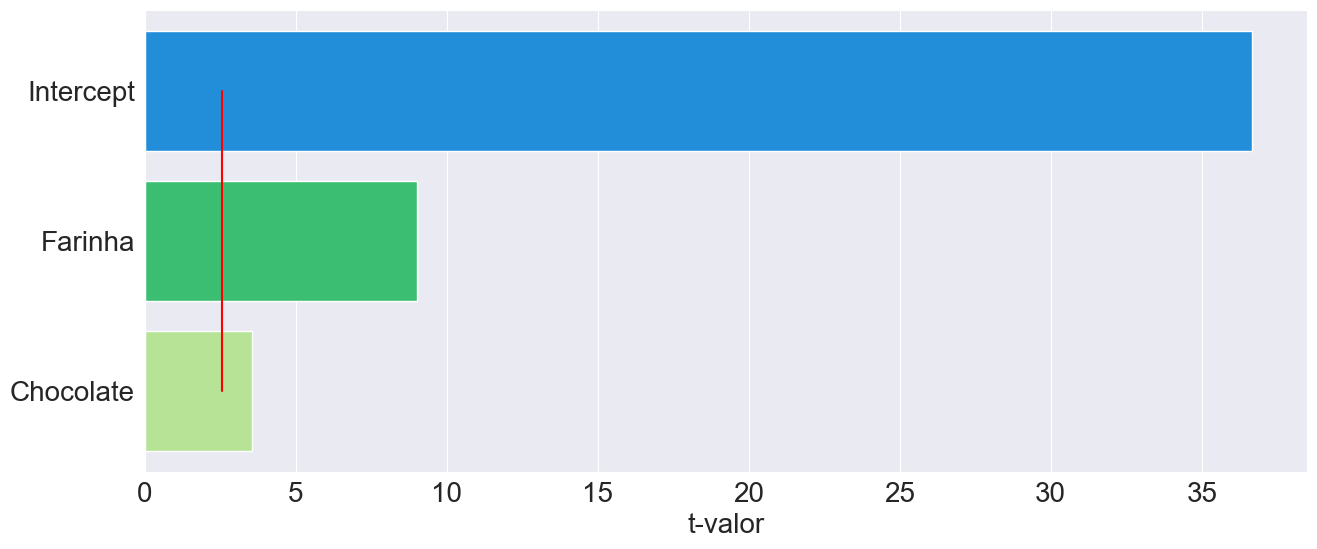

In [53]:
pareto = sns.barplot(x = t_valores, y = nome)
pareto.figure.set_size_inches(15,6)
pareto.tick_params(labelsize = 20)
pareto.set_xlabel('t-valor', fontsize=20)

pareto.plot(limite, nome, 'r')

<font color='red' style='font-size: 30px;'> Preditos por observados  </font>
<hr style='border: 2px solid red;'>

In [54]:
observados = experimento['Porcoes']

In [55]:
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Porcoes, dtype: int64

### .

In [57]:
preditos = modelo_ajustado_2.predict()

In [58]:
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

### .

In [59]:
import matplotlib.pyplot as plt

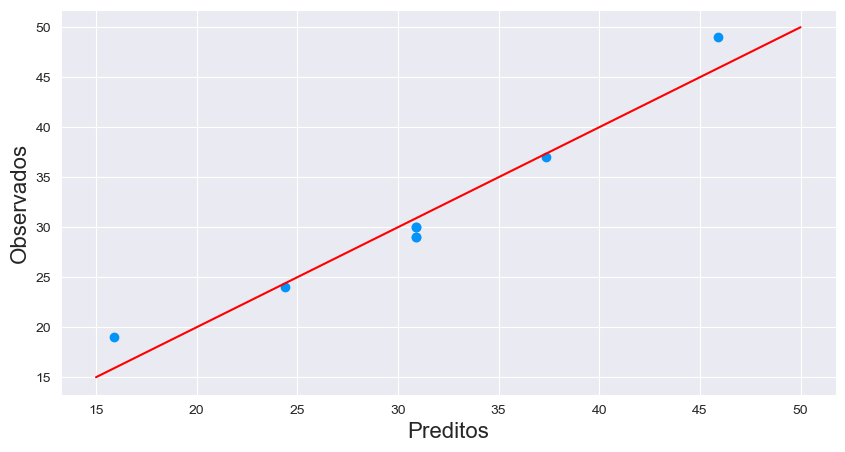

In [62]:
plt.figure(figsize=(10,5))

plt.xlabel('Preditos', fontsize=16)
plt.ylabel('Observados', fontsize=16)

#linha de guia
x = np.linspace(start=15, stop=50, num =10)

y = np.linspace(start=15, stop=50, num=10)

plt.plot(x,y, 'r')

#comparacao
plt.scatter(preditos, observados)


Podemos assumir que este modelo é representativo. Os pontos experimentais estão próximos da linha de guia.

<hr>

Outra forma de avaliar o modelo é observando o "R-squared" no **summary()**:

In [63]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Tue, 23 May 2023   Prob (F-statistic):           0.000571
Time:                        11:27:10   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

C:\Users\Vitoria Neris\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


O "R-squared" é o "R" ao quadrado. E este "R" é chamado de coeficiente de determinação. Quanto mais próximo de um este valor estiver, melhor terá sido o ajuste do modelo. No caso, temos um valor próximo de 1: 0,95. Isso significa que os valores preditos pelo nosso modelo estão bem próximos dos valores observados pela confeiteira durante a execução do experimento. 

### .

# <font color = 'purple'> Explorando o modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [64]:
parametros = modelo_ajustado_2.params

In [65]:
parametros

Intercept    30.875
Farinha      10.750
Chocolate     4.250
dtype: float64

### .

### Definindo a função

In [67]:
def modelo_receita(x_f, x_c):
    #limite
    limite_normalizado = [-1,+1]
    limite_farinha = [0.5, 1.5]
    limite_chocolate=[0.1, 0.5]
    
    #converter
    x_f_convertido = np.interp(x_f, limite_farinha, limite_normalizado)
    x_c_convertido = np.interp(x_c, limite_chocolate, limite_normalizado)
    
    porcoes = parametros['Intercept'] + parametros['Farinha']*x_f_convertido + parametros['Chocolate']*x_c_convertido
    
    return round(porcoes)

Testando a quantidade de farinha e chocolate que a Bel pretende usar, utilizando a função:

In [69]:
modelo_receita(0.6,0.1)

18


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_22.png'> 


<hr>

# <font color = 'purple'> Mapa de cores   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_23.jpg'> 

#### Fonte: National Centers for Environmental Prediction


<hr>



<p style='margin: 50px 50px;'>




<p style='margin: 150px 150px;'>


<hr>

<img width='600px' src='figuras/Figura_24.png'> 


<hr>



<p style='margin: 30px 30px;'>

In [70]:
x_farinha = np.linspace(start = 0.5, stop=1.5, num=10)
x_farinha

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

In [72]:
x_chocolate = np.linspace(start = 0.1, stop = 0.5, num=10)
x_chocolate

array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

### . 

In [73]:
pontos = []

for cont1 in x_farinha:
    temp = []
    for cont2 in x_chocolate:
        temp.append(modelo_receita(cont1,cont2))
    pontos.append(temp)
        

In [74]:
pontos

[[16, 17, 18, 19, 20, 21, 22, 22, 23, 24],
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
 [21, 22, 23, 23, 24, 25, 26, 27, 28, 29],
 [23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
 [28, 29, 30, 31, 32, 33, 33, 34, 35, 36],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [33, 34, 34, 35, 36, 37, 38, 39, 40, 41],
 [35, 36, 37, 38, 39, 40, 41, 42, 43, 43],
 [37, 38, 39, 40, 41, 42, 43, 44, 45, 46]]

### .

### Construindo a superfície de resposta

In [75]:
import matplotlib.cm as cm

https://matplotlib.org/users/colormaps.html

<a list of 14 text.Text objects>

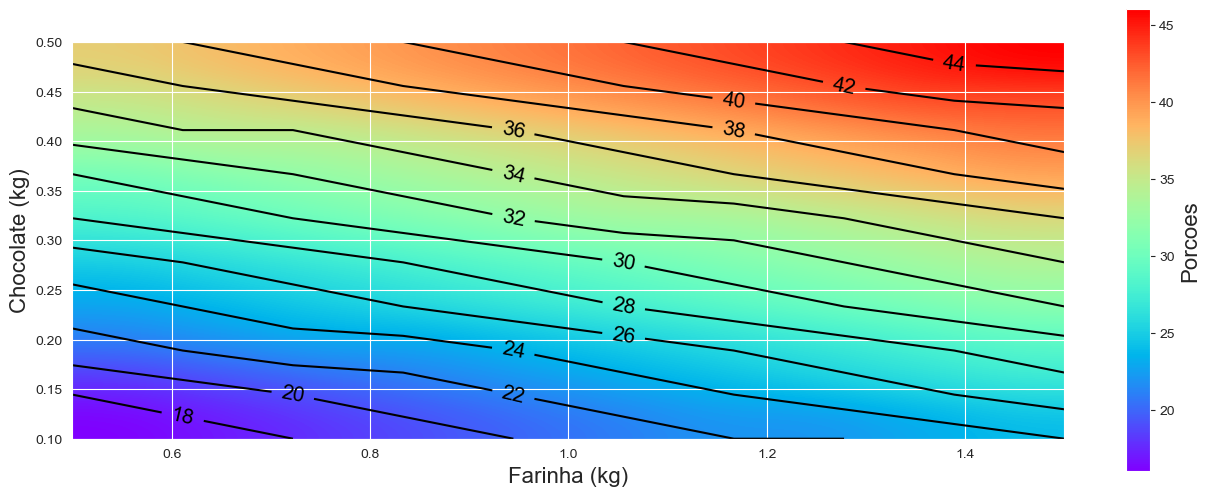

In [86]:
#base

plt.figure(figsize = (16,6))

plt.xlabel('Farinha (kg)', fontsize = 16)

plt.ylabel('Chocolate (kg)', fontsize = 16)


#Mapa de cores 

mapa_cor = plt.imshow(pontos, origin = 'lower',  cmap = cm.rainbow, interpolation= 'quadric', extent = (0.5,1.5, 0.1,0.5))


#Barra de cor

plt.colorbar().set_label('Porcoes', fontsize = 16)


#linha 

linhas = plt.contour(x_farinha, x_chocolate, pontos, levels=14, colors = 'k', linewidths = 1.5)


plt.clabel(linhas, inline = True, fmt = '%1.0f', fontsize = 15.0 , inline_spacing = 10)

Conseguimos assim interpretar melhor como é o comportamento da nossa receita, dentro de toda a área experimental.